In [167]:

import pandas as pd
import matplotlib.pyplot as plt

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [181]:
data_dist1M = pd.read_csv('BLE_1mSep_120320.csv')
data_dist2M = pd.read_csv('BLE_2mSep_120320.csv')
data_dist3M = pd.read_csv('BLE_3mSep_130320.csv')
data_dist4M = pd.read_csv('BLE_4mSep_130320.csv')
data_dist5M = pd.read_csv('BLE_5mSep_120320.csv')

normalise = False
if (normalise):
    data_dist1M['RSSI'] =  data_dist1M['RSSI'].transform(lambda x : x/x.max())
    data_dist2M['RSSI'] =  data_dist2M['RSSI'].transform(lambda x : x/x.max())
    data_dist3M['RSSI'] =  data_dist3M['RSSI'].transform(lambda x : x/x.max())
    data_dist4M['RSSI'] =  data_dist4M['RSSI'].transform(lambda x : x/x.max())
    data_dist5M['RSSI'] =  data_dist5M['RSSI'].transform(lambda x : x/x.max())

MEAN


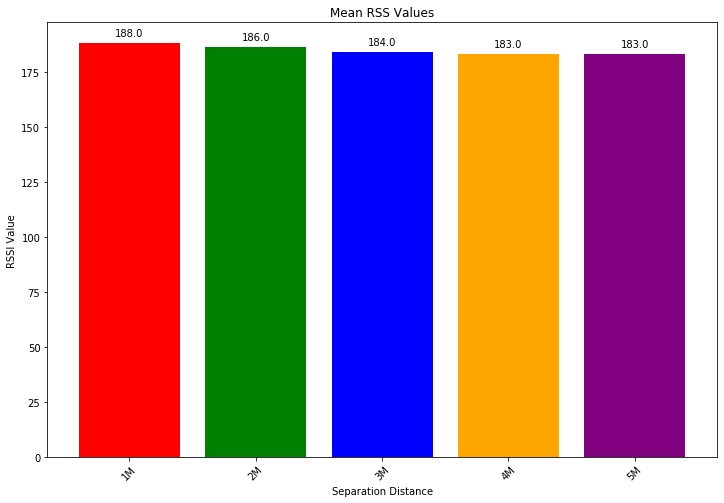

In [184]:
print("MEAN")
meanList = [data_dist1M['RSSI'].mean(), data_dist2M['RSSI'].mean(),
            data_dist3M['RSSI'].mean(), data_dist4M['RSSI'].mean(),
            data_dist5M['RSSI'].mean()]

meanList = [int(i) for i in meanList]
distList = ['1M', '2M', '3M', '4M', '5M']
colourList = ['red', 'green', 'blue','orange','purple'] 
meanSeries = pd.Series(meanList)

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = meanSeries.plot(kind='bar', color=colourList, width=0.8)
ax.set_title('Mean RSS Values')
ax.set_xlabel('Separation Distance')
ax.set_ylabel('RSSI Value')
ax.set_xticklabels(distList, rotation = "45")

# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("distanceMeans.png")

MEDIAN


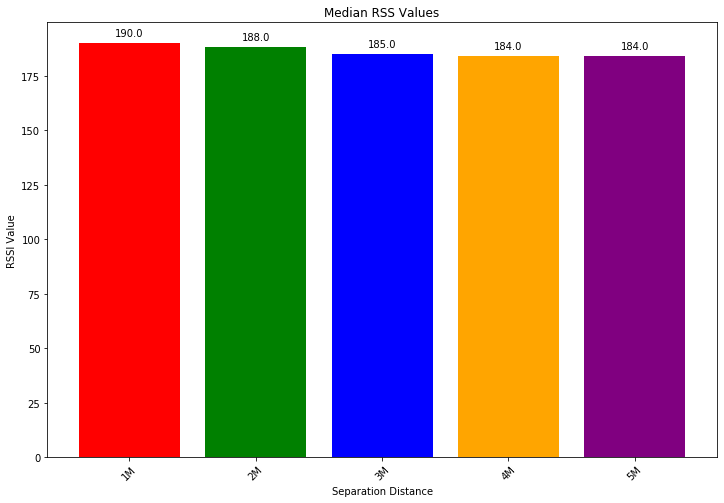

In [186]:
print("MEDIAN")
medianList = [data_dist1M['RSSI'].median(), data_dist2M['RSSI'].median(),
            data_dist3M['RSSI'].median(), data_dist4M['RSSI'].median(),
            data_dist5M['RSSI'].median()]

medianList = [int(i) for i in medianList]
distList = ['1M', '2M', '3M', '4M', '5M']
colourList = ['red', 'green', 'blue','orange','purple'] 
medianSeries = pd.Series(medianList)

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = medianSeries.plot(kind='bar', color=colourList, width=0.8)
ax.set_title('Median RSS Values')
ax.set_xlabel('Separation Distance')
ax.set_ylabel('RSSI Value')
ax.set_xticklabels(distList, rotation = "45")

# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("distanceMedians.png")

MODE


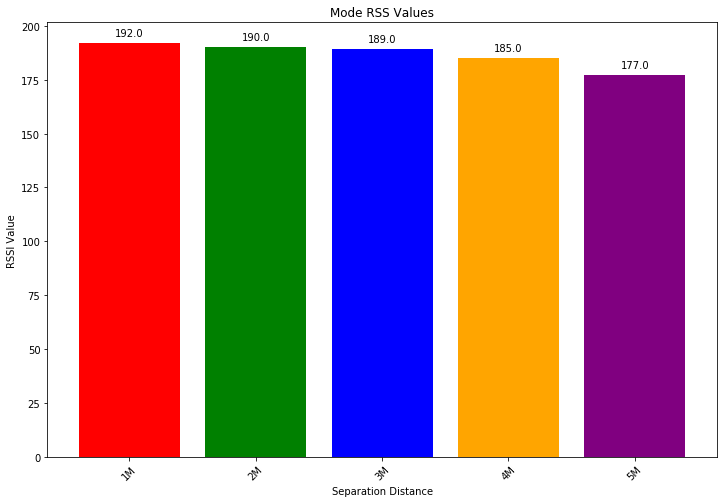

In [187]:
print("MODE")
modeList = [data_dist1M['RSSI'].mode(), data_dist2M['RSSI'].mode(),
            data_dist3M['RSSI'].mode(), data_dist4M['RSSI'].mode(),
            data_dist5M['RSSI'].mode()]

modeList = [int(i) for i in modeList]
distList = ['1M', '2M', '3M', '4M', '5M']
colourList = ['red', 'green', 'blue','orange','purple'] 
modeSeries = pd.Series(modeList)

# Plot the figure.
plt.figure(figsize=(12, 8))
ax = modeSeries.plot(kind='bar', color=colourList, width=0.8)
ax.set_title('Mode RSS Values')
ax.set_xlabel('Separation Distance')
ax.set_ylabel('RSSI Value')
ax.set_xticklabels(distList, rotation = "45")

# Call the function above. All the magic happens there.
add_value_labels(ax)

plt.savefig("distanceModes.png")

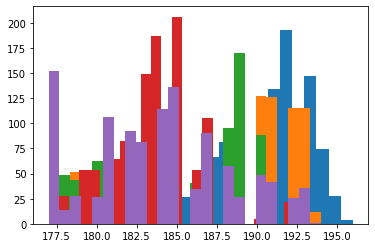

Total records for 1M:  1208
Total records for 2M:  1216
Total records for 3M:  1180
Total records for 4M:  1201
Total records for 5M:  1113


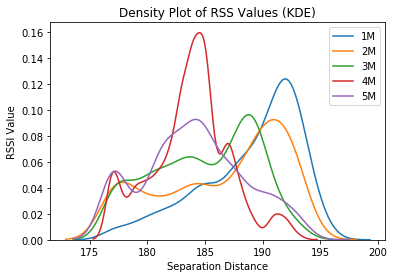

In [210]:
bins = 200-175
# 1m histogram
x1m = data_dist1M['RSSI']
plt.hist(x1m, bins)

x2m = data_dist2M['RSSI']
plt.hist(x2m, bins)

x3m = data_dist3M['RSSI']
plt.hist(x3m, bins)

x4m = data_dist4M['RSSI']
plt.hist(x4m, bins)

x5m = data_dist5M['RSSI']
plt.hist(x5m, bins)
plt.show()
import seaborn as sns

# https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
# kde_kws = {'shade': True, 'linewidth': 3}
sns.distplot(x1m, hist=False, kde=True, label = "1M")
sns.distplot(x2m, hist=False, kde=True, label = "2M")
sns.distplot(x3m, hist=False, kde=True, label = "3M")
sns.distplot(x4m, hist=False, kde=True, label = "4M")
sns.distplot(x5m, hist=False, kde=True, label = "5M")
plt.title('Density Plot of RSS Values (KDE)')
plt.xlabel('Separation Distance')
plt.ylabel('RSSI Value')
print("Total records for 1M: ", len(x1m))
print("Total records for 2M: ", len(x2m))
print("Total records for 3M: ", len(x3m))
print("Total records for 4M: ", len(x4m))
print("Total records for 5M: ", len(x5m))
plt.savefig("distanceDensityPlot.png")